**Text Features**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE

**Embedding Visulaisation**

In [2]:
an_df = pd.read_csv(r"C:\Users\user\Desktop\MLPC\annotations.csv")
an_df.head(2)

,task_id,filename,annotator,text,onset,offset,filename_unsafe
0,161977861,560761.mp3,5945971035380930099053858595454362549806990533...,bird twitters nearby with a high pitch two times,16.552368,17.271435,560761_tufted titmouse calling.mp3
1,161987165,240538.mp3,4916274343929406460752597829190197300566135449...,A cow bell clinging repeatedly,12.265866,15.420303,240538_AMB - Cowbell stable Stereowav.mp3


In [3]:
an_em = np.load(r"C:\Users\user\Desktop\MLPC\annotations_text_embeddings.npz")["embeddings"]

In [ ]:
s= StandardScaler()
scaled_text_features= s.fit_transform(an_em)
pca=KernelPCA(n_components=50, kernel="rbf")
downp = pca.fit_transform(scaled_text_features)

In [ ]:
fig,ax = plt.subplots(figsize=(14,7))
sns.scatterplot(x=downp[:, 0], y=downp[:, 1],ax=ax)

**Clustering**

In [ ]:
s= StandardScaler()
scaled_text_features= s.fit_transform(an_em)
kmeans = KMeans(4)
an_df["cluster"] = kmeans.fit_predict(scaled_text_features)
an_df["pc1"] = downp[:,0]
an_df["pc2"] = downp[:,1]

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(downp,  kmeans.fit_predict(scaled_text_features), metric='euclidean')
print(f"Silhouette Score: {score:.2f}") 

<Axes: xlabel='pc1', ylabel='pc2'>

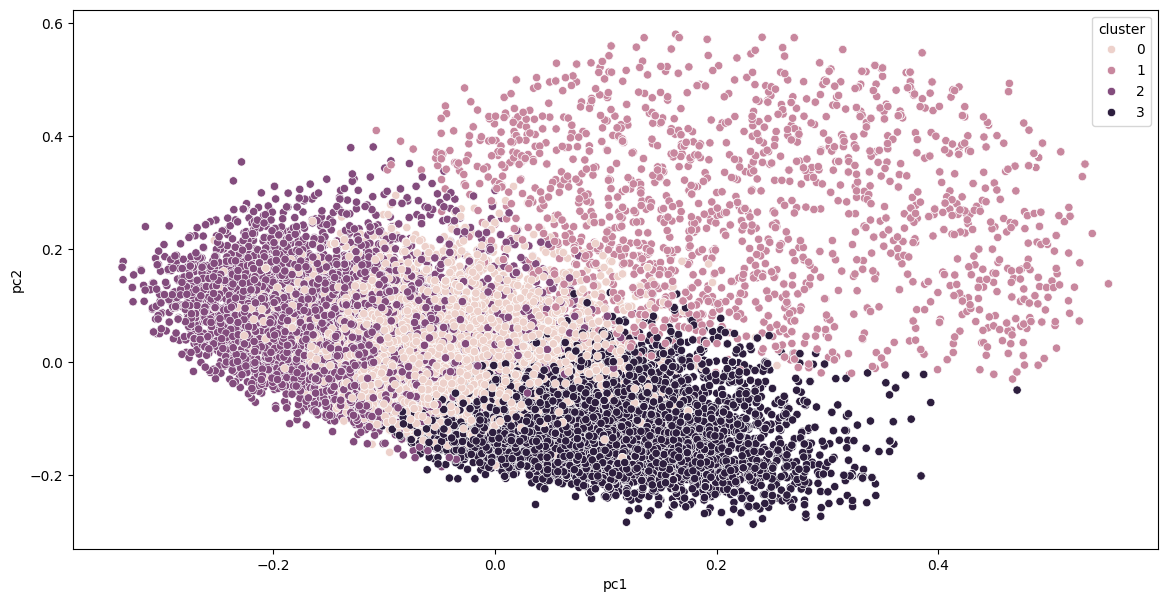

In [25]:
fig,ax= plt.subplots(1,figsize=(14,7))
sns.scatterplot(data=an_df,x="pc1",y="pc2",hue="cluster",ax=ax)


In [21]:
cluster_stats = an_df.groupby('cluster').agg({
    'c1': ['mean', 'min', 'max', 'count'],
    'c2': ['mean', 'min', 'max']
})
print(cluster_stats)

                c1                                        c2              \
              mean         min         max  count       mean         min   
cluster                                                                    
0        11.281317 -105.592674  108.358162   8618  10.581781  -96.785873   
1       -11.583886 -110.299530  107.477196  12007   8.682198 -102.554558   
2         3.325001 -101.770096   95.993126   2884 -71.944969  -98.725845   
3         2.104666 -110.302521  107.468452  12317   1.445377 -102.622131   

                     
                max  
cluster              
0         97.746124  
1        100.042953  
2         74.676048  
3        100.054138  


*answer: i would say you could end up with 3-4 meaningful clusters what do you guys think ?*